## [TODO] NAME CARD


In [1]:
"""
# extract out-line of namecard1,2 :
"""
# dest = destination

import sys
import random
import cv2

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from _path import get_cut_dir
dir_home = get_cut_dir('openCV_TAcademy')


# functions : for a few initial path setting



In [3]:
# NC1=어두운사진 / NC2=밝은사진
src = cv2.imread(dir_home + '/src/namecard1.jpg')

# 이미지 로딩이 안되었으면 = 실패! 종료
if src is None:
    print('Image load failed!')
    sys.exit()

In [4]:
def getRGB(img_BGR):
    return cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

def getBGR(img_RGB):
    return cv2.cvtColor(img_RGB, cv2.COLOR_RGB2BGR)

def getGray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

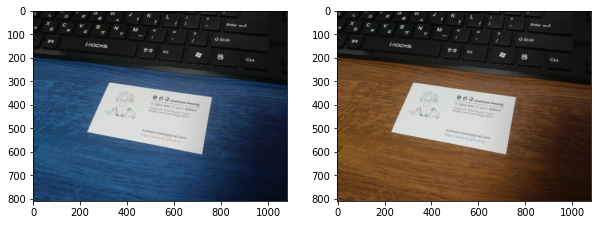

In [5]:
fig, axes = plt.subplots(1,2, figsize=(10,6))

axes[0].imshow(src)      # CV2    BGR color
axes[1].imshow(getRGB(src))  # pyplot RGB color

In [6]:
# 명함 이미지 소스를 만든다 = Resize 50%
src = cv2.resize(src, (0, 0), fx=0.5, fy=0.5)

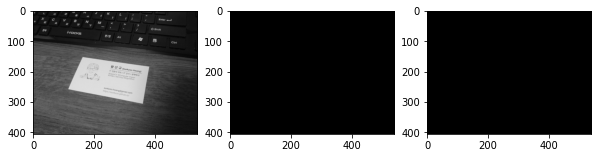

In [7]:
src_gray = getGray(src)

h, w = src_gray.shape[:2]
dst1 = np.zeros((h, w, 3), np.uint8)
dst2 = np.zeros((h, w, 3), np.uint8)

fig, axes = plt.subplots(1,3, figsize=(10,5))
axes[0].imshow(getRGB(src_gray))
axes[1].imshow(getRGB(dst1))      # empty 3-channels array
axes[2].imshow(getRGB(dst2))      # empty 3-channels array

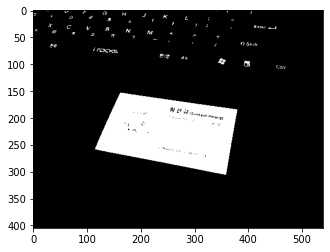

In [8]:
# 이진화 이미지 검출
_, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.imshow(getRGB(src_bin))

In [9]:
# 외곽선 검출 옵션 - bounds list 를 만든다.
contours1, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours2, _ = cv2.findContours(src_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

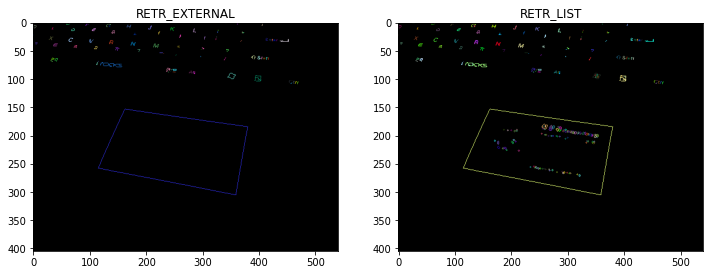

In [15]:
for i in range(len(contours1)):
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst1, contours1, i, c, 1)

for i in range(len(contours2)):
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst2, contours2, i, c, 1)
    

fig, axes = plt.subplots(1,2, figsize=(12,7))
axes[0].set_title('RETR_EXTERNAL')
axes[0].imshow(getRGB(dst1))
   
axes[1].set_title('RETR_LIST')
axes[1].imshow(getRGB(dst2))      # empty 3-channels array 

In [14]:
# cv2.imshow('src_resize', src)
# cv2.imshow('src_binary', src_bin)

cv2.imshow('destination-01 : RETR_EXTERNAL', dst1)  
cv2.imshow('destination-02 : RETR_LIST', dst2)

# PRESS ANY KEY TO CLOSE POP-UP WINDOWS
cv2.waitKey()
cv2.destroyAllWindows()